In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import sklearn.datasets

mnist = sklearn.datasets.fetch_openml('mnist_784', data_home="mnist_784")
train_X = torch.tensor(mnist.data[:60000], dtype=torch.float) / 255
train_Y = torch.tensor([int(x) for x in mnist.target[:60000]])
val_X = torch.tensor(mnist.data[60000:], dtype=torch.float) / 255
val_Y = torch.tensor([int(x) for x in mnist.target[60000:]])

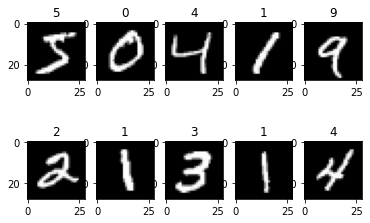

In [2]:
train_X = train_X.view(len(train_X), -1, 28, 28)
val_X = val_X.view(len(val_X), -1, 28, 28)

plt.figure()
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(train_X[i].view(28, 28), cmap='gray')
  plt.title(train_Y[i].numpy())
plt.show()

In [3]:
lr = 0.001
batch_size = 100
epoch = 1

class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 20, kernel_size=(5, 5), stride=1),
        nn.BatchNorm2d(20),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2, 2), stride=2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(20, 50, kernel_size=(5, 5), stride=1),
        nn.BatchNorm2d(50),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2, 2), stride=2)
    )
    self.input_size = 50*4*4
    self.layer3 = nn.Linear(in_features=self.input_size, out_features=50)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = torch.flatten(out, start_dim=1)
    out = self.layer3(out)
    return out

model = CNN()
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr = lr)
train_X = train_X.view(batch_size, -1, 28, 28)
train_Y = train_Y.view(batch_size, -1)

for ep in range(10):
  print('epoch : ', ep+1)
  ave_cost = 0
  for batch in range(batch_size):
    optimizer.zero_grad()
    X = train_X[batch]  #(600, 28, 28)
    X = X.unsqueeze(1)
    y_pred = model.forward(X)
    cost = loss(y_pred, train_Y[batch])
    cost.backward()
    optimizer.step()
    ave_cost += cost
  print(ave_cost / batch_size)




epoch :  1
tensor(0.4372, grad_fn=<DivBackward0>)
epoch :  2
tensor(0.0886, grad_fn=<DivBackward0>)
epoch :  3
tensor(0.0597, grad_fn=<DivBackward0>)
epoch :  4
tensor(0.0459, grad_fn=<DivBackward0>)
epoch :  5
tensor(0.0373, grad_fn=<DivBackward0>)
epoch :  6
tensor(0.0312, grad_fn=<DivBackward0>)
epoch :  7
tensor(0.0265, grad_fn=<DivBackward0>)
epoch :  8
tensor(0.0227, grad_fn=<DivBackward0>)
epoch :  9
tensor(0.0194, grad_fn=<DivBackward0>)
epoch :  10
tensor(0.0166, grad_fn=<DivBackward0>)


In [4]:
val_pred = model.forward(val_X)
val_pred = val_pred.argmax(axis=1)

T, F = 0, 0
for i in range(10000):
  if val_pred[i] == val_Y[i]:
    T += 1
  else:
    F += 1
print(T, F)
print(T / (T+F))


9891 109
0.9891
